In [1]:
import math
import os
import matplotlib.pyplot as plt
import pprint


In [2]:
def d(a,b):
    c = 0.0
    for i in range(len(a)):
        c+=math.pow(a[i] - b[i],2)
    return math.sqrt(c)

In [3]:
#讀資料
def readdata(datanum,people):
    adata=[[0 for i in range(datanum)] for j in range(people)]
    for i in range(people):
        for j in range(datanum):
            f=open(".\\角度資料\\0729(0.25)(1+1點)角度資料\\" + str(i+1)+"-"+str(j+1) + ".txt","r")
            adata[i][j]=f.readlines()
            f.close()
    for i in range(len(adata)):
        for j in range(len(adata[i])):
            for k in range(len(adata[i][j])):
                adata[i][j][k]=float(adata[i][j][k])
    return adata

In [4]:
#打亂資料
def randdata(adata):
    import random
    newdata=[[] for i in range(len(adata))]
    for p in range(len(adata)):
        n=len(adata[p])
        tdata=[-1 for i in range(n)]
        j=0
        for i in range(n):
            while 1:
                a=random.randint(0,n-1)
                if tdata[a]==-1:
                    tdata[a]=j
                    j=j+1
                    break

        for i in range(n):
            newdata[p]+=[adata[p][tdata[i]]]
    return newdata

In [13]:
#列印結果
def printres(res,table=1,rec=1,pre=1,acc=1):
    import pandas
    import copy
    pres=copy.deepcopy(res)
    if table==1:
        display(pandas.DataFrame(pres))
    recall=[]
    precision=[]
    for i in range(len(res)):
        r=0
        p=0
        for j in range(len(res[i])):
            r+=res[i][j]
            p+=res[j][i]
        recall+=[res[i][i]/r]
        precision+=[res[i][i]/p]
    if rec==1:
        print("召回率")
        print(recall)
    if pre==1:
        print("精確率")
        print(precision)
    if acc==1:
        tot=0
        isright=0
        for i in range(len(res)):
            for j in range(len(res[i])):
                tot+=res[i][j]
                if i==j:
                    isright+=res[i][j]
        print("準確率",isright/tot)
    f1=[]
    for i in range(len(recall)):
        f1+=[2/((1/recall[i])+(1/precision[i]))]
    print("f1平均為:",float(sum(f1))/len(f1))
    return {"ZHL":recall,"JQL":precision,"f1TH":f1,"f1THPJ":float(sum(f1))/len(f1)}

In [6]:
adata=readdata(466,4)


In [7]:
adata=randdata(adata)

In [8]:
class KNN:
    def __init__(self,data):
        self.data=data
    def test(self,testdata,k=1):
        ddata=[]
        for i in range(len(self.data)):
            for j in range(len(self.data[i])):
                ddata+=[[i,d(self.data[i][j],testdata)]]
        ddata=sorted(ddata, key = lambda x : x[1]) 
        ans=[0 for i in range(len(self.data))]
        totd=0
        for i in range(k):
            ans[(ddata[i][0])]+=1/ddata[i][1]
        return ans.index(max(ans))
    def bigtest(self,testdata,k=1):
        res=[[0 for j in range(len(testdata))] for i in range(len(testdata))]
        for i in range(len(testdata)):
            for j in range(len(testdata[i])):
                ans=self.test(testdata[i][j],k)
                res[i][ans]+=1
        return res


In [9]:
def cutdata(adata):
    TrainDataFrom=0  #訓練從
    TrainDataEnd=400 #訓練到(不含)
    bdata=[0 for i in range(len(adata))]
    for i in range(len(adata)):
        bdata[i]=adata[i][TrainDataFrom:TrainDataEnd]
    TestDataFrom=400 #測試從
    TestDataEnd=467 #測試到(不含)
    cdata=[0 for i in range(len(adata))]
    for i in range(len(adata)):
        cdata[i]=adata[i][TestDataFrom:TestDataEnd]
    return bdata,cdata

k== 1
f1平均為: 0.7866051594483934
f1平均為: 0.8018652773349095
f1平均為: 0.7986783197309513
f1平均為: 0.8031692819365377
f1平均為: 0.788264677307131
f1平均為: 0.8367432336182337
f1平均為: 0.8137497073207294
f1平均為: 0.8137030713974653
f1平均為: 0.818054669969324
f1平均為: 0.7713276115442709
k== 2
f1平均為: 0.8099151690060781
f1平均為: 0.8171156080909321
f1平均為: 0.7830070412059306
f1平均為: 0.832137307137307
f1平均為: 0.79892253136934
f1平均為: 0.7854453083114366
f1平均為: 0.8179076338222626
f1平均為: 0.8059131268586104
f1平均為: 0.7528684678795803
f1平均為: 0.802972551950743
k== 3
f1平均為: 0.7873513706377926
f1平均為: 0.8447621678869088
f1平均為: 0.8101186299081036
f1平均為: 0.8299003421159444
f1平均為: 0.8259704402897737
f1平均為: 0.7765182059276781
f1平均為: 0.7947301598049837
f1平均為: 0.7877494057000441
f1平均為: 0.7955892508701919
f1平均為: 0.8292453184036847
k== 4
f1平均為: 0.8029858514505888
f1平均為: 0.8174742427546569
f1平均為: 0.8589255940781346
f1平均為: 0.8062118014642579
f1平均為: 0.8025774572649573
f1平均為: 0.8408777754178185
f1平均為: 0.8105593617195714
f1平均為: 0.80226070226

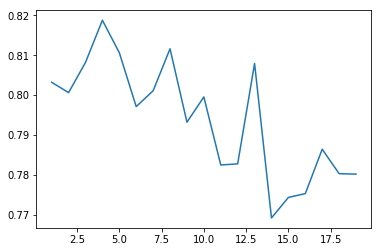

In [17]:
#在不同K值
x=[]
y=[]
for knn in range(1,20):
    x+=[knn]
    print("k==",knn)
    ans=0
    for i in range(10):
        adata=randdata(adata)
        bdata,cdata=cutdata(adata)
        MyKNN=KNN(bdata)
        res=MyKNN.bigtest(cdata,knn)
        ans+=printres(res,0,0,0,0)["f1THPJ"]
    y+=[ans/10]
plt.plot(x,y)
plt.show()

In [81]:
MyKNN=KNN(bdata)

In [82]:
print(MyKNN.test(adata[2][400]))

2


In [83]:
#for i in range(400,466):
#    print(MyKNN.test(adata[0][i],2))

In [85]:
#MyKNN.bigtest(cdata,1)

[[52, 2, 4, 8], [3, 57, 5, 1], [2, 7, 54, 3], [7, 7, 5, 47]]

In [107]:
res=MyKNN.bigtest(cdata,1)

In [1]:
printres(res)

NameError: name 'printres' is not defined

1
